In [38]:
import pandas as pd
# pd.__version__



mc = pd.read_csv('microsoft.csv',index_col = 0)
mc.head() 


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100


In [39]:
mc.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-30,93.300003,93.660004,92.099998,92.739998,92.306389,38635100
2018-01-31,93.750000,95.400002,93.510002,95.010002,94.565781,48756300
2018-02-01,94.790001,96.070000,93.580002,94.260002,93.819290,47227900
2018-02-02,93.639999,93.970001,91.500000,91.779999,91.350883,47867800
2018-02-05,90.559998,93.239998,88.000000,88.000000,87.588554,51031500


In [40]:
mc.describe()


,Open,High,Low,Close,Adj Close,Volume
count,780.000000,780.000000,780.000000,780.000000,780.000000,7.800000e+02
mean,58.912308,59.372308,58.465000,58.945397,56.931553,2.978900e+07
std,12.852040,12.868060,12.802831,12.830350,13.670080,1.522319e+07
min,40.340000,40.740002,39.720001,40.290001,37.267815,7.425600e+06
25%,47.894998,48.295000,47.535001,47.974998,44.792073,2.096685e+07
50%,56.150002,56.640001,55.700001,56.209999,53.775458,2.623125e+07
75%,67.892500,68.174997,67.447500,67.740000,66.565508,3.408020e+07
max,95.139999,96.070000,93.720001,95.010002,94.565781,1.691640e+08


In [41]:
mc.shape

(780, 6)

<AxesSubplot:xlabel='Date'>

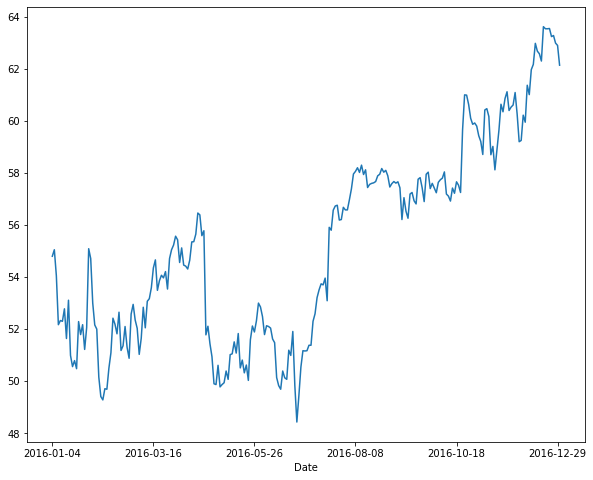

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 8))


# plot only the Close price of 2016 of Microsoft, 1 line 
mc.loc['2016-01-01':'2016-12-31','Close'].plot()

<AxesSubplot:xlabel='Date'>

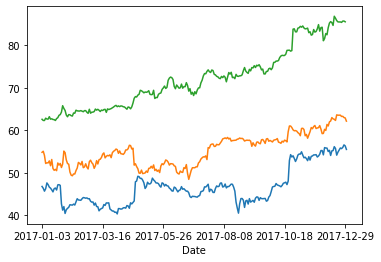

In [43]:
mc.loc['2015-01-01':'2015-12-31','Close'].plot()
mc.loc['2016-01-01':'2016-12-31','Close'].plot()
mc.loc['2017-01-01':'2017-12-31','Close'].plot()

In [44]:
mc[['Open', 'Low']] 

,Open,Low
Date,,
2014-12-31,46.730000,46.450001
2015-01-02,46.660000,46.540001
2015-01-05,46.369999,46.250000
2015-01-06,46.380001,45.540001
2015-01-07,45.980000,45.490002
...,...,...
2018-01-30,93.300003,92.099998
2018-01-31,93.750000,93.510002
2018-02-01,94.790001,93.580002


In [45]:
mc['Price1'] = mc['Close'].shift(-1)
mc['PriceDiff'] = mc['Close'].shift(-1) - mc['Close']
mc.head()
 

,Open,High,Low,Close,Adj Close,Volume,Price1,PriceDiff
Date,,,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,46.759998,0.309997
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,46.330002,-0.429996
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,45.650002,-0.680000
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,46.230000,0.579998
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,47.590000,1.360000


In [46]:
mc['Return'] = mc['PriceDiff'] /mc['Close']
print(mc['Return'].loc['2015-01-05'])

-0.014677314281143345


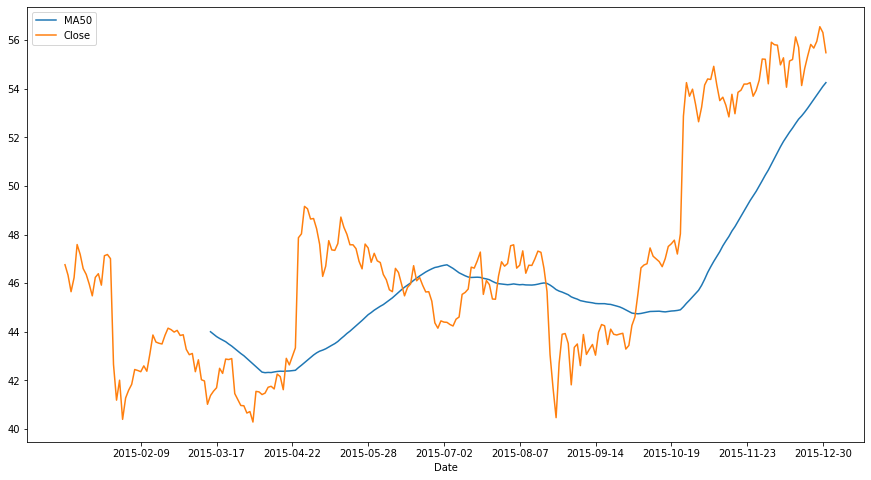

In [47]:
mc['Direction'] = [1 if mc['PriceDiff'].loc[ei] > 0 else 0 for ei in mc.index ]
mc['ma50'] = mc['Close'].rolling(50).mean()

#plot the moving average
plt.figure(figsize=(15, 8))
mc['ma50'].loc['2015-01-01':'2015-12-31'].plot(label='MA50')
mc['Close'].loc['2015-01-01':'2015-12-31'].plot(label='Close')
plt.legend()
plt.show()

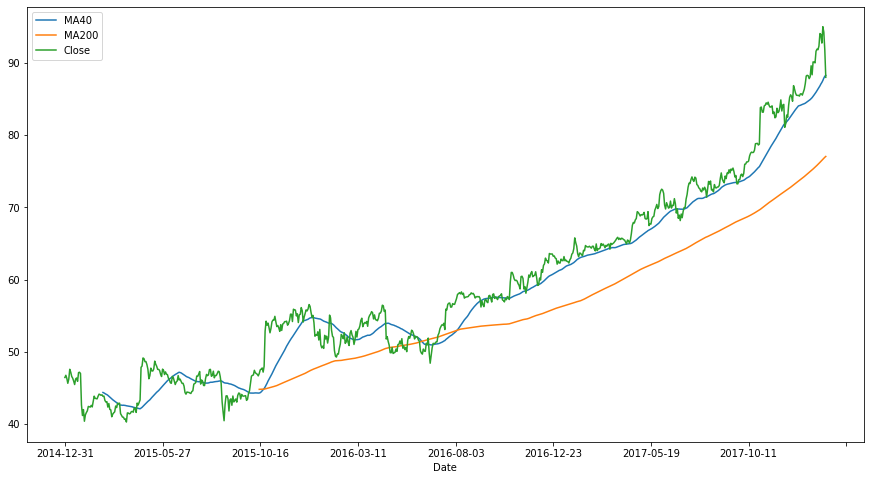

In [48]:
plt.figure(figsize=(15, 8))
mc['MA40'] = mc['Close'].rolling(40).mean()
mc['MA200'] = mc['Close'].rolling(200).mean()
mc['MA40'].plot()
mc['MA200'].plot()
mc['Close'].plot()
plt.legend()

In [49]:
mc = pd.read_csv('microsoft.csv')
mc['MA10'] = mc['Close'].rolling(10).mean()
mc['MA50'] = mc['Close'].rolling(50).mean()
mc = mc.dropna()
mc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA10,MA50
49,2015-03-13,40.700001,41.470001,40.610001,41.380001,38.443489,58007700,42.495,44.0034
50,2015-03-16,41.470001,41.639999,41.279999,41.560001,38.610714,35273500,42.263,43.9056
51,2015-03-17,41.369999,41.830002,41.150002,41.700001,38.740784,31587200,42.105,43.8044
52,2015-03-18,41.430000,42.830002,41.330002,42.500000,39.484009,43971800,42.049,43.7278
53,2015-03-19,42.259998,42.590000,42.220001,42.290001,39.288918,33879100,41.967,43.6606


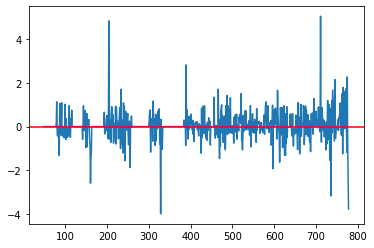

In [50]:
mc['Shares'] = [1 if mc.loc[ei, 'MA10']>mc.loc[ei, 'MA50'] else 0 for ei in mc.index]
mc['Close1'] = mc['Close'].shift(-1)
mc['Profit'] = [mc.loc[ei, 'Close1'] - mc.loc[ei, 'Close'] if mc.loc[ei, 'Shares']==1 else 0 for ei in mc.index]
mc['Profit'].plot()
plt.axhline(y=0, color='red')

In [52]:
mc['wealth'] = mc['Profit'].cumsum()
mc.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Close1,Profit,wealth
775,2018-01-30,93.300003,93.660004,92.099998,92.739998,92.306389,38635100,91.862,86.5244,1,95.010002,2.270004,30.540009
776,2018-01-31,93.750000,95.400002,93.510002,95.010002,94.565781,48756300,92.349,86.7606,1,94.260002,-0.750000,29.790009
777,2018-02-01,94.790001,96.070000,93.580002,94.260002,93.819290,47227900,92.765,86.9978,1,91.779999,-2.480003,27.310006
778,2018-02-02,93.639999,93.970001,91.500000,91.779999,91.350883,47867800,92.943,87.1828,1,88.000000,-3.779999,23.530007
779,2018-02-05,90.559998,93.239998,88.000000,88.000000,87.588554,51031500,92.582,87.2684,1,NaN,NaN,NaN


Text(0.5, 1.0, 'Total money you win is 23.53000699999999')

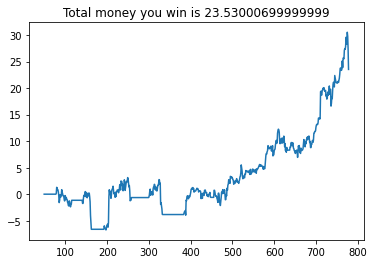

In [54]:
mc['wealth'].plot()
plt.title('Total money you win is {}'.format(mc.loc[mc.index[-2], 'wealth']))